In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# uploading the file
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
# creating a new DataFrame
df= pd.read_excel("AdventureWorks.xlsx")

In [5]:
# Showing the first 5 lines 
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# checking the number of lines and columns present 
df.shape

(904, 16)

In [7]:
# checking the types of data 
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
# what is the total revenue?
df["Valor Venda"].sum()

5984606.1426

In [9]:
# what is the total expense?
df["total expense"] = df["Custo Unitário"].mul(df["Quantidade"])
df["total expense"].sum()

2486783.05

In [10]:
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,total expense
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [11]:
# using round
round(df["total expense"].sum(), 2)

2486783.05

In [12]:
# calculating the profit
df["profit"] = df["Valor Venda"] - df ["total expense"]

In [13]:
# total profit
round(df["profit"].sum(), 2)

3497823.09

In [14]:
# calculating the time to deliver the product
df["Delivery Time"] = df["Data Envio"] - df["Data Venda"]

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,total expense,profit,Delivery Time
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [16]:
# extracting just the day from delivery time 
df["Delivery Time"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [17]:
# checking if delivery time is integer
df["Delivery Time"].dtypes

dtype('int64')

In [18]:
# Calculating the average number of days necessary to deliver the product per brand
df.groupby(df["Marca"])["Delivery Time"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Delivery Time, dtype: float64

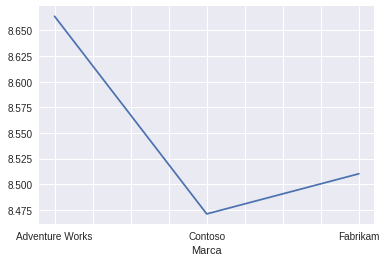

In [20]:
df.groupby(df["Marca"])["Delivery Time"].mean().plot();

In [24]:
df.groupby(df["Marca"])["Delivery Time"].mean().sort_values()

Marca
Contoso            8.470930
Fabrikam           8.510121
Adventure Works    8.663866
Name: Delivery Time, dtype: float64

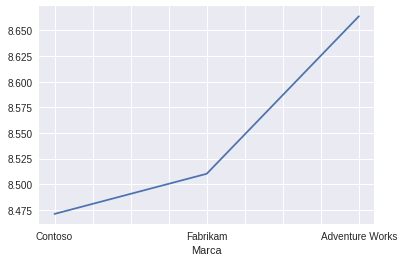

In [27]:
df.groupby(df["Marca"])["Delivery Time"].mean().sort_values().plot();

**Looking for Missing Values**

In [28]:
# checking if there are any missing values
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
total expense     0
profit            0
Delivery Time     0
dtype: int64

In [29]:
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
total expense     0
profit            0
Delivery Time     0
dtype: int64

**Profit per year and brand**

In [31]:
# grouping by year and brand 
df.groupby([df["Data Venda"].dt.year, "Marca"])["profit"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: profit, dtype: float64

In [33]:
# Removing scientific notation from the number
pd.options.display.float_format= '{:20,.2f}'.format

In [34]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["profit"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: profit, dtype: float64

In [36]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["profit"].sum().sort_values()

Data Venda  Marca          
2008        Contoso                      56,416.00
2009        Contoso                     138,258.95
2008        Adventure Works             306,641.16
2009        Adventure Works             405,395.08
            Fabrikam                  1,034,091.35
2008        Fabrikam                  1,557,020.55
Name: profit, dtype: float64

In [37]:
# reseting index and bring as dataframe
profit_year = df.groupby([df["Data Venda"].dt.year, "Marca"])["profit"].sum().reset_index()
profit_year

,Data Venda,Marca,profit
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [40]:
# How many products are sold?
df.groupby(df["Produto"])["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [41]:
# Another form to bring the same results 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

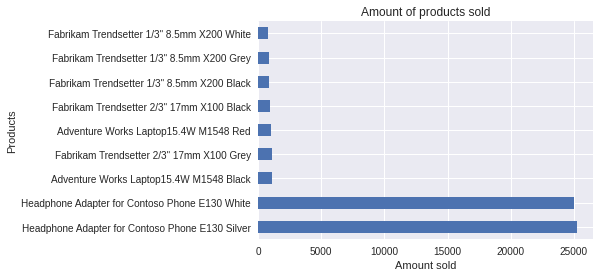

In [44]:
#Creating a chart to show the amount of products sold
df.groupby(df["Produto"])["Quantidade"].sum().sort_values(ascending = False).plot.barh(title="Amount of products sold")
plt.ylabel("Products")
plt.xlabel("Amount sold");

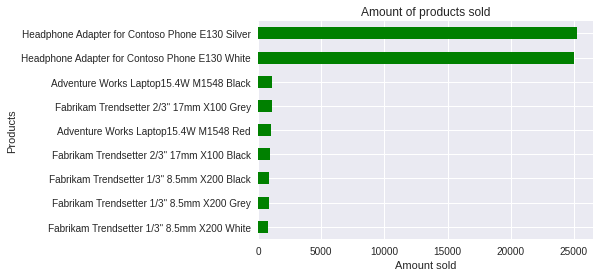

In [46]:
df.groupby(df["Produto"])["Quantidade"].sum().sort_values(ascending = True).plot.barh(title="Amount of products sold", color = "green")
plt.ylabel("Products")
plt.xlabel("Amount sold");

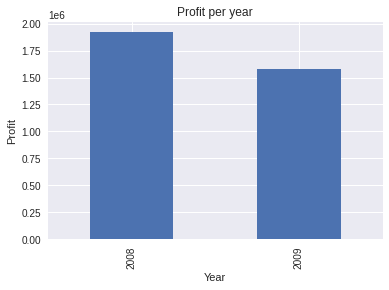

In [48]:
# Chart Profit x Year
df.groupby(df["Data Venda"].dt.year)["profit"].sum().plot.bar(title = "Profit per year")
plt.xlabel("Year")
plt.ylabel("Profit");

In [49]:
# just to compare the numbers 
df.groupby(df["Data Venda"].dt.year)["profit"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: profit, dtype: float64

In [50]:
# focusing on 2009 sales
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [51]:
df_2009.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,total expense,profit,Delivery Time
808,2009-02-09,2009-02-19,307,384,19116,200902093CS699,348.58,758.00,6,909.60,"3,638.40",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","1,546.92",10
407,2009-03-30,2009-04-12,307,1178,19119,200903304CS709,330.66,998.00,12,"2,395.20","9,580.80",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"3,967.92","5,612.88",13
128,2009-09-24,2009-10-04,307,1155,19136,200909244CS726,324.69,980.00,6,0.00,"5,880.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,931.86",10
454,2009-02-23,2009-03-06,307,366,19117,200902233CS706,348.58,758.00,16,"2,425.60","9,702.40",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"5,577.28","4,125.12",11
83,2009-07-17,2009-07-22,306,1203,19071,200907174CS760,324.69,980.00,6,0.00,"5,880.00",Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"1,948.14","3,931.86",5


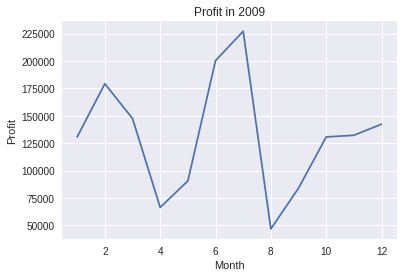

In [53]:
# Profit per month in 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["profit"].sum().plot(title="Profit in 2009")
plt.xlabel("Month")
plt.ylabel("Profit");

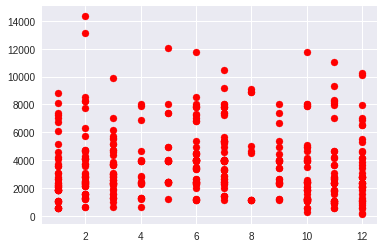

In [58]:
# scatter plot 

plt.scatter(x = df_2009["Data Venda"].dt.month, y = df_2009["profit"], color = "red");

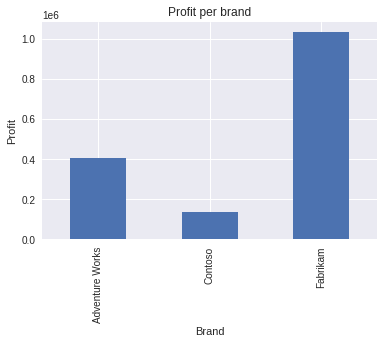

In [65]:
# profit per brand
df_2009.groupby("Marca")["profit"].sum().plot.bar(title="Profit per brand")
plt.xlabel("Brand")
plt.ylabel("Profit");

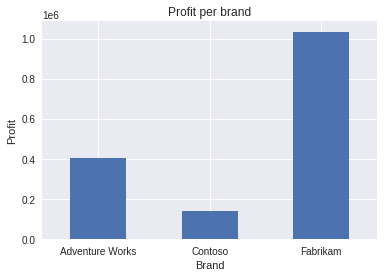

In [66]:
# profit per brand - 2
df_2009.groupby("Marca")["profit"].sum().plot.bar(title="Profit per brand")
plt.xlabel("Brand")
plt.ylabel("Profit")
plt.xticks(rotation = 'horizontal');

In [67]:
df_2009.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,total expense,profit,Delivery Time
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


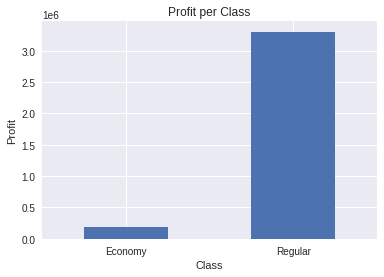

In [68]:
# profit per class
df.groupby("Classe")["profit"].sum().plot.bar(title="Profit per Class")
plt.xlabel("Class")
plt.ylabel("Profit")
plt.xticks(rotation="horizontal");

**Statistical Analysis**

In [69]:
df["Delivery Time"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Delivery Time, dtype: float64

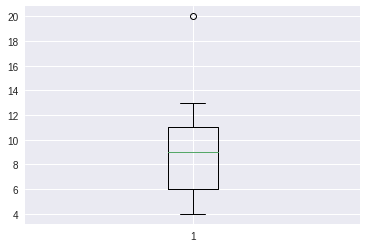

In [70]:
# using Boxplot, considering the outliers
plt.boxplot(df["Delivery Time"]);

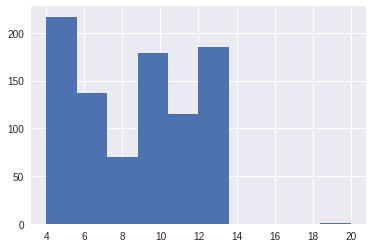

In [71]:
# histogram
plt.hist(df["Delivery Time"]);

In [72]:
# min delivery time
df["Delivery Time"].min()

4

In [73]:
# max delivery time
df["Delivery Time"].max()

20

In [74]:
# exploring the outlier
df[df["Delivery Time"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,total expense,profit,Delivery Time
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [76]:
# saving in a new CSV file
df.to_csv("New_AdventureWorks.csv", index = False)